<a href="https://colab.research.google.com/github/ruchithabijja/-AlmaBetter--EDA-Global-Terrorism-Analysis/blob/main/Final_Global_Terrorism_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv(r"/content/drive/My Drive/project/Global Terrorism Data.csv",encoding='latin1')
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
dataset.shape 

(181691, 135)

In [ ]:
list(dataset.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [ ]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
weap_sub=dataset['weapsubtype1_txt']
num_kill=dataset['nkill']
latitude_1=dataset['latitude']
longitude_1=dataset['longitude']
dcity=dataset['city']
dmonth=dataset['imonth']
dlocation=dataset['location']
dsuicide=dataset['suicide']
dwound=dataset['nwound']

# **DATA CLEANING**

<b>DATA CLEANING IS THE SECOND STEP OF AN EFFICIENT DATA ANALYSIS.</b>


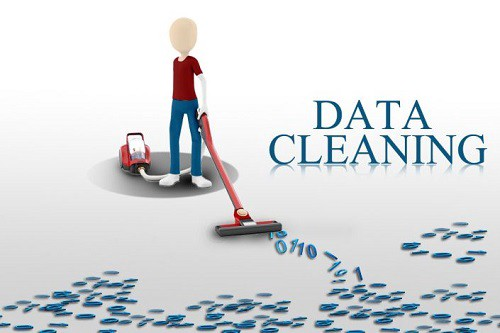

### **1. REMOVING HIGHLY NULL VALUED COLUMNS/ROWS**

In [ ]:
dataset.isnull().sum()


eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
dataset=dataset.dropna(thresh=len(dataset)*.8, axis='columns')
dataset=dataset.dropna(axis=1,inplace=False,how='any')
df = dataset.select_dtypes(include=np.number)
remove_cols=df.loc[:, (df<5).any()]
dataset=dataset.drop(axis=1,inplace=False,columns=remove_cols.columns)
dataset=dataset.fillna(0)
dataset.isnull().sum()

dataset['weapons']=weap_sub
dataset['kills']=num_kill
dataset['dlatitude']=latitude_1
dataset['dlongitude']=longitude_1
dataset['CITY']=dcity
dataset['month']=dmonth
dataset['Location']=dlocation
dataset['Suicide']=dsuicide
dataset['Wound']=dwound

dataset.columns.tolist()



['eventid',
 'iyear',
 'country_txt',
 'region_txt',
 'attacktype1_txt',
 'targtype1_txt',
 'gname',
 'weaptype1_txt',
 'dbsource',
 'weapons',
 'kills',
 'dlatitude',
 'dlongitude',
 'CITY',
 'month',
 'Location',
 'Suicide',
 'Wound']

In [ ]:
dataset.head()
dataset.shape

(181691, 18)

In [ ]:
print('Country with most attacks: ',dataset['country_txt'].value_counts().idxmax())
Country_with_most_attacks=dataset['country_txt'].value_counts().idxmax()
dataset[dataset['country_txt']==Country_with_most_attacks]
print('City with most attacks: ',dataset['CITY'].value_counts().idxmax())
City_with_most_attacks=dataset['CITY'].value_counts().idxmax()

print("Region with the most attacks:",dataset['region_txt'].value_counts().idxmax())
Region_with_the_most_attacks=dataset['region_txt'].value_counts().idxmax()

print("Year with the most attacks:",dataset['iyear'].value_counts().idxmax())
Year_with_the_most_attacks=dataset['iyear'].value_counts().idxmax()
    
print("Month with the most attacks:",dataset['month'].value_counts().idxmax())
Month_with_the_most_attacks=dataset['month'].value_counts().idxmax()

print("Group with the most attacks:",dataset['gname'].value_counts().index[1])
Group_with_the_most_attacks=dataset['gname'].value_counts().index[1]

print("Most Attack Types:",dataset['attacktype1_txt'].value_counts().idxmax())
Most_Attack_Types=dataset['attacktype1_txt'].value_counts().idxmax()
 






Country with most attacks:  Iraq
City with most attacks:  Unknown
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


## Ploting in maps of most attacked country

# <b>ATTACKS IN EVERY YEAR</b>

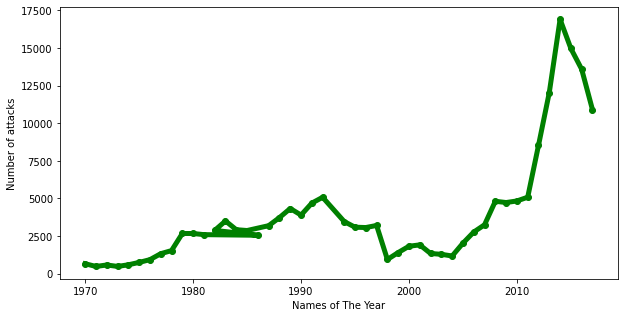

In [ ]:
x_year = dataset['iyear'].unique()
y_year = dataset['iyear'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(x_year,y_year,'go-',linewidth=5)
plt.xlabel('Names of The Year')
plt.ylabel('Number of attacks')
plt.show()



In [ ]:
import plotly.express as px
group_killed= dataset[['country_txt','kills']].groupby(['country_txt'],axis=0).sum().sort_values('kills', ascending=False).head(15)
group_killed.reset_index()
data = dict(
    stage=group_killed.index,
    number=group_killed.kills.values)
fig = px.funnel(data, x='number', y='stage')
fig.show()




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



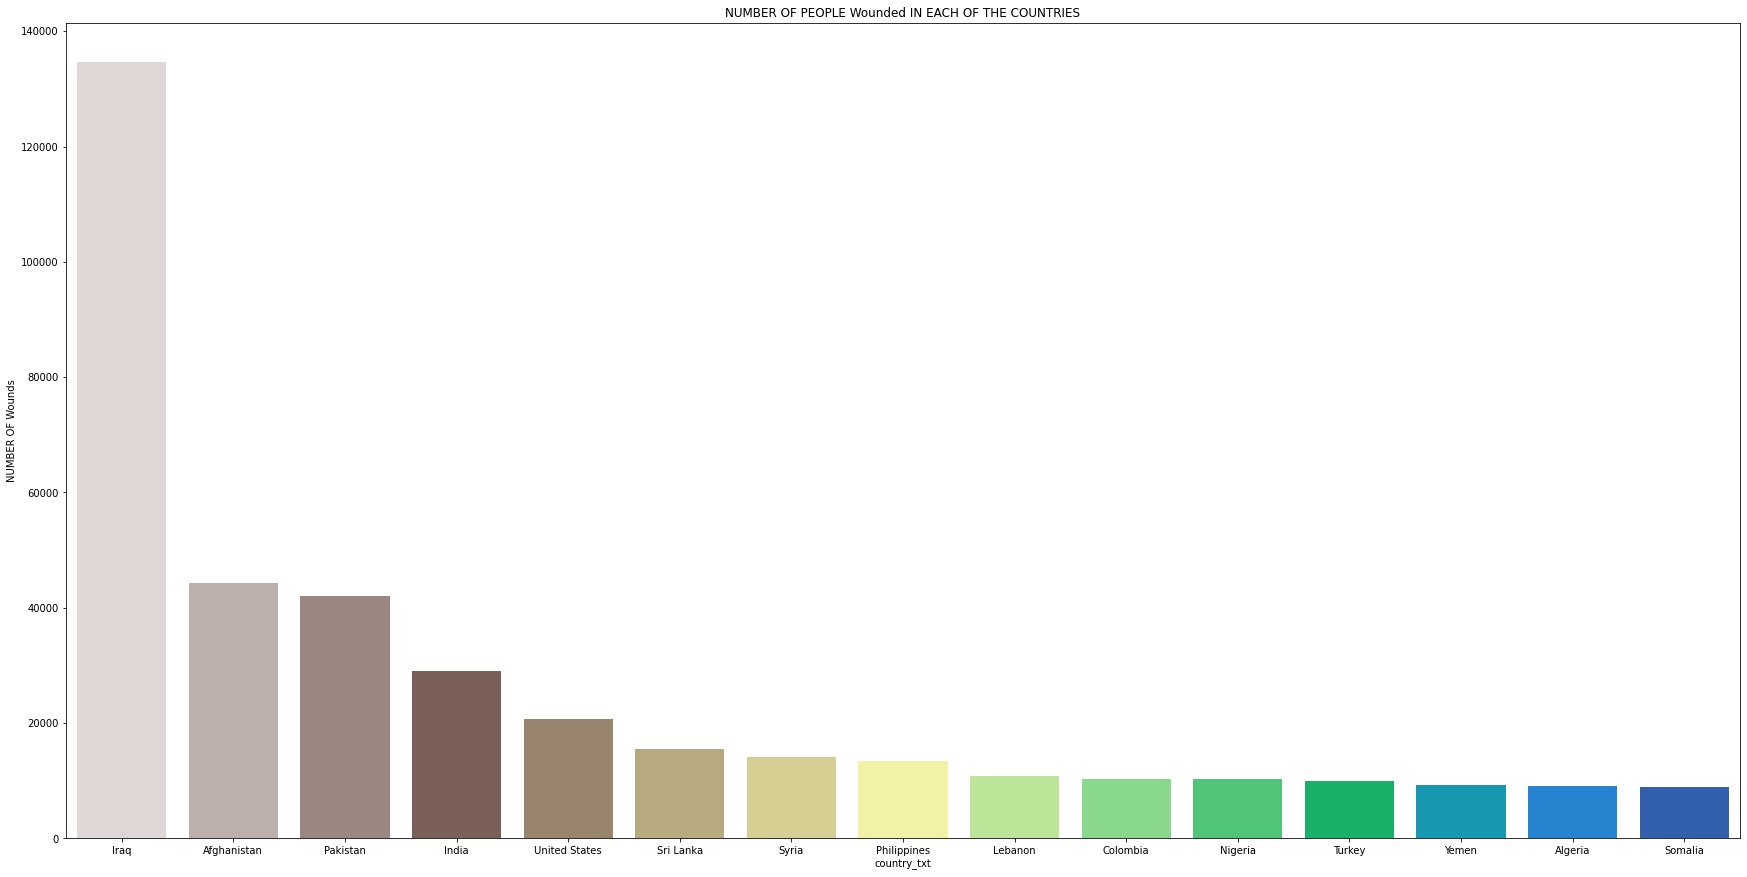

In [ ]:
group_wounded= dataset[['country_txt','Wound']].groupby(['country_txt'],axis=0).sum().sort_values('Wound', ascending=False).head(15)

plt.subplots(figsize=(30,15))
plt.title('NUMBER OF PEOPLE Wounded IN EACH OF THE COUNTRIES')
plt.xlabel('COUNTRIES')
plt.ylabel('NUMBER OF Wounds')
sns.barplot(group_wounded.index, group_wounded.Wound.values,palette="terrain_r")

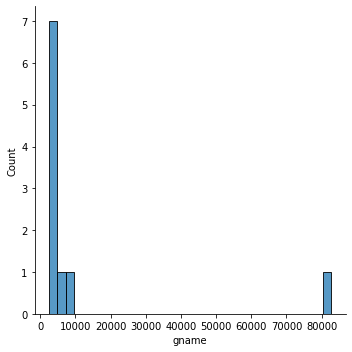

In [ ]:
datapeer=dataset['gname'].value_counts().head(10)

sns.displot(datapeer)





In [ ]:
group_wounding= dataset[['gname','Wound']].groupby(['gname'],axis=0).sum().sort_values('Wound', ascending=False).head(15)
group_wounding.reset_index()
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    x = group_wounding.index,
    y = group_wounding.Wound.values,
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Number of people wounded by each gang",
        showlegend = True
)

fig.show()

<b></b>

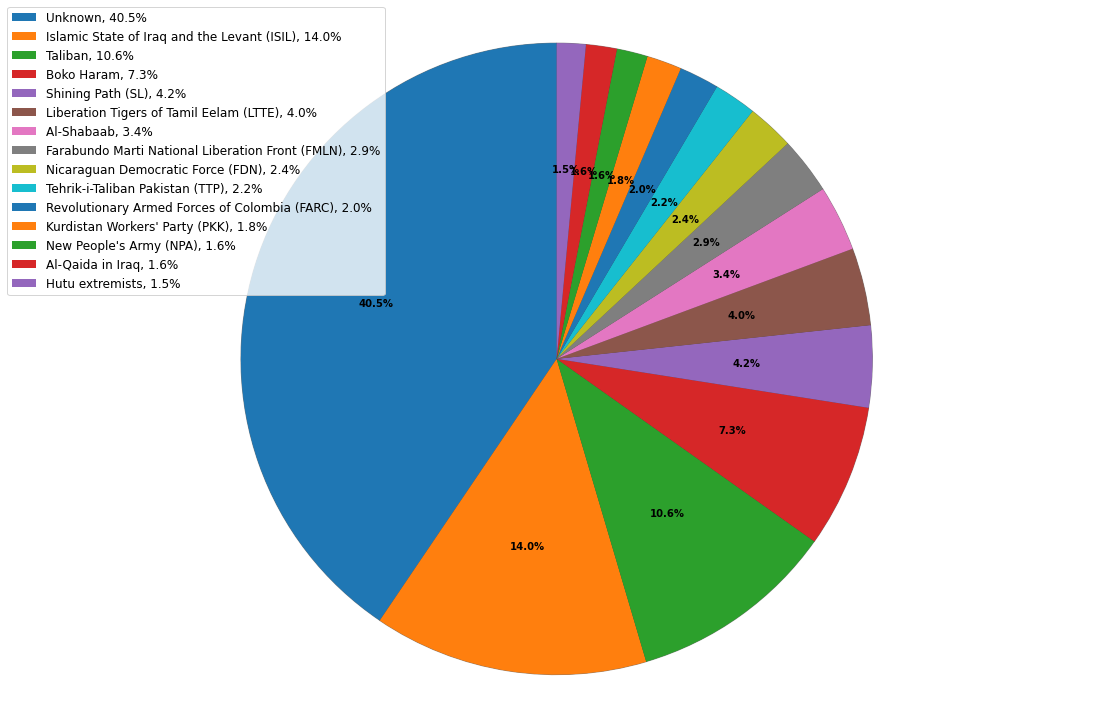

In [ ]:
group_attacked= dataset[['gname','kills']].groupby(['gname'],axis=0).sum().sort_values('kills', ascending=False).head(15)
def autopct_generator(limit):
    
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct
labels=group_attacked.index.to_list()
sizes=group_attacked.kills.to_list()


NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(20, 10))


box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])
explode=(0,0.5,0,0.5,0,0,0,0,0,0,0,0,0,0,0)

_, _, autotexts = ax1.pie(
    sizes, autopct='%1.1f%%', startangle=90, radius=1.8 * 1000,shadow=True,explode=explode)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
plt.tight_layout()
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
# fig1.set_size_inches(100, 80)
fig1.savefig('chart.png')




In [ ]:
country_kills=dataset.groupby('country_txt')
maxkill_in_each_country=country_kills.max('kills')
maxkill_in_each_country.head(20)


,eventid,iyear,kills,dlatitude,dlongitude,month,Suicide,Wound
country_txt,,,,,,,,
Afghanistan,201712310020,2017,266.0,38.000000,71.584167,12,1,491.0
Albania,201710110028,2017,6.0,42.399981,20.428889,12,0,30.0
Algeria,201709220009,2017,256.0,37.068190,9.556767,12,1,286.0
Andorra,197407140002,1974,NaN,NaN,NaN,7,0,NaN
Angola,201708250057,2017,259.0,-4.446342,23.016835,12,0,405.0
Antigua and Barbuda,199203070003,1992,NaN,17.117528,-61.845557,3,0,NaN
Argentina,201708020032,2017,92.0,-23.276090,-55.900812,12,1,236.0
Armenia,201607170002,2016,14.0,41.245833,46.238333,12,0,46.0
Australia,201712210017,2017,3.0,-12.462820,153.431388,12,1,21.0


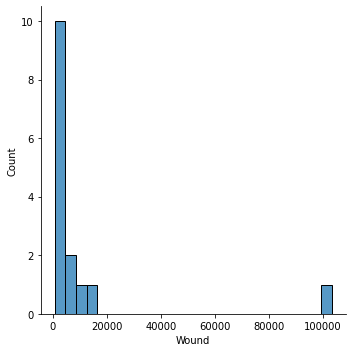

In [ ]:
d=dataset['Wound'].value_counts().head(15)
sns.displot(d)

In [ ]:
import plotly.express as px
data = dict(
    number=dataset['country_txt'],
    stage=dataset['kills'])
fig = px.funnel(data, x='number', y='stage')
fig.show()


# AL-Qaida!


In [ ]:
group_gname=dataset.groupby('gname')
Al_Qaida=group_gname.get_group('Al-Qaida')
Al_Qaida

,eventid,iyear,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource,weapons,kills,dlatitude,dlongitude,CITY,month,Location,Suicide,Wound
54691,199212290002,1992,Yemen,Middle East & North Africa,Bombing/Explosion,Business,Al-Qaida,Explosives,PGIS,Unknown Explosive Type,2.0,12.852693,44.894836,Aden,12,NaN,0,5.0
54692,199212290003,1992,Yemen,Middle East & North Africa,Bombing/Explosion,Business,Al-Qaida,Explosives,PGIS,Unknown Explosive Type,1.0,12.852693,44.894836,Aden,12,NaN,0,1.0
68071,199808070002,1998,Kenya,Sub-Saharan Africa,Bombing/Explosion,Government (Diplomatic),Al-Qaida,Explosives,CETIS,Vehicle,224.0,-1.285180,36.821107,Nairobi,8,NaN,1,4000.0
68072,199808070003,1998,Tanzania,Sub-Saharan Africa,Bombing/Explosion,Government (Diplomatic),Al-Qaida,Explosives,CETIS,Vehicle,11.0,-6.813546,39.239418,Dar es Salaam,8,NaN,1,85.0
69876,200001030010,2000,Yemen,Middle East & North Africa,Bombing/Explosion,Military,Al-Qaida,Explosives,UMD Miscellaneous,Vehicle,0.0,12.825647,44.846416,Aden,1,Gulf of Aden,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85923,200803110011,2008,Pakistan,South Asia,Bombing/Explosion,Police,Al-Qaida,Explosives,CETIS,Suicide (carried bodily by human being),27.0,31.505470,74.342880,Lahore,3,NaN,1,200.0
85944,200803150001,2008,Pakistan,South Asia,Bombing/Explosion,Tourists,Al-Qaida,Explosives,CETIS,Other Explosive Type,1.0,33.671638,73.056068,Islamabad,3,NaN,0,10.0
87834,200807090016,2008,Turkey,Middle East & North Africa,Armed Assault,Police,Al-Qaida,Firearms,ISVG,Automatic or Semi-Automatic Rifle,6.0,41.106178,28.689863,Istanbul,7,The incident occurred outside of the US Consul...,0,2.0
95008,201001190011,2010,Pakistan,South Asia,Hostage Taking (Kidnapping),Private Citizens & Property,Al-Qaida,Unknown,ISVG,NaN,0.0,27.560076,68.215714,Larkana,1,NaN,0,0.0


## Al_Qaida was the most mischievous gang in early 20's and killed most of the people. They used Explosives and vehicle-borne explosive mostly to kill the people.


### MOST ACTIVE GANG in 2016






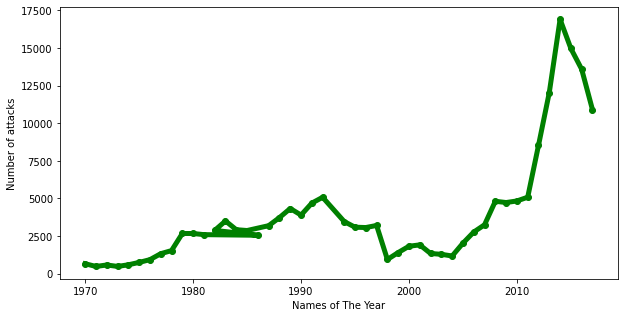

In [ ]:
attack_2011=dataset[dataset['iyear']==2016]
attack3=attack_2011['gname'].value_counts() # most number of attacks are by Islamic State of Iraq and the Levant (ISIL) and 1154
x_year = dataset['iyear'].unique()
y_year = dataset['iyear'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(x_year,y_year,'go-',linewidth=5)
plt.xlabel('Names of The Year')
plt.ylabel('Number of attacks')
plt.show()



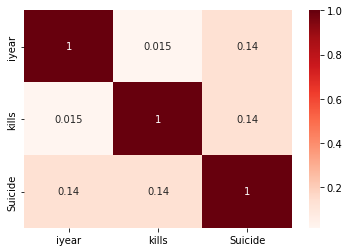

In [ ]:
sns.heatmap(dataset[['iyear','kills','Suicide']].corr(), annot=True, cmap = 'Reds')

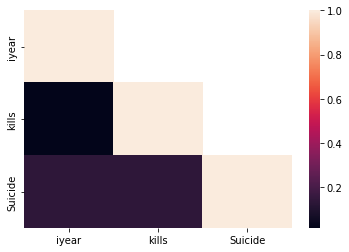

In [ ]:
import numpy as np
mask = np.triu(np.ones_like(dataset[['iyear','kills','Suicide']].corr(), dtype=bool))
np.fill_diagonal(mask, False)  # keeps the diagonal
sns.heatmap(mask=mask,data=dataset[['iyear','kills','Suicide']].corr())


In [ ]:
max_killevery_gname=[]
for i in dataset:
  if i=='year':
    for j in range(2004,2018):
      attack=dataset[dataset['year']==j]
      max_killevery_gname.append(attack.gang_name.value_counts()[1:2])
  

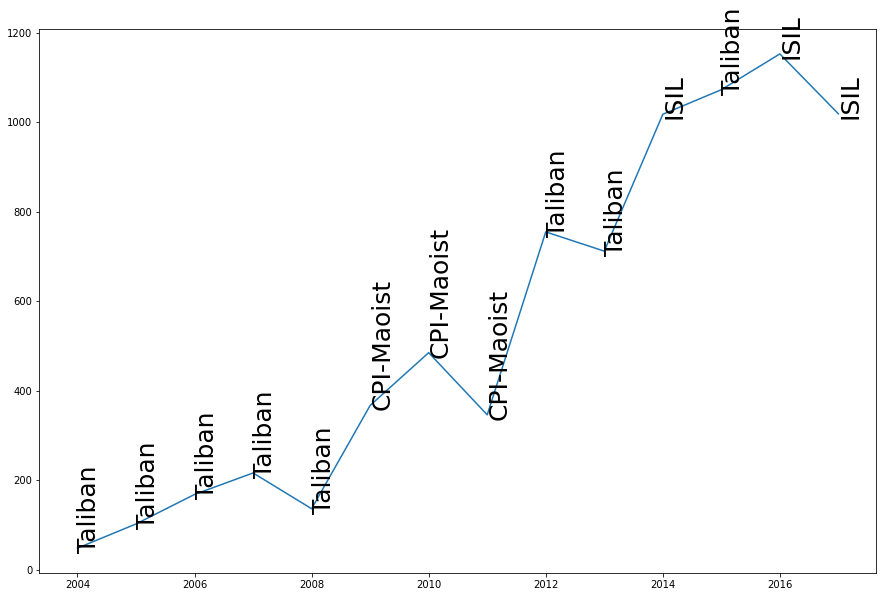

In [ ]:
year=[2004,2005,2006,2007,2008,
      2009,2010,2011,2012,
      2013,2014,2015,2016,2017]
gang_name=['Taliban','Taliban','Taliban','Taliban','Taliban',
           'CPI-Maoist','CPI-Maoist','CPI-Maoist','Taliban',
           'Taliban','ISIL','Taliban','ISIL','ISIL']
number_of_attack=[48, 102, 168,216,136, 
                  367, 485, 346, 755,
                  712,1018, 1073, 1153, 1019]
plt.figure(figsize=(15,10))
plt.plot(year,number_of_attack)
for i in range(len(year)):
        plt.text(year[i],number_of_attack[i],gang_name[i],rotation=90,fontsize=25)

## so we can say that from 2004 most active gang is Taliban,CPI-Maoist,ISIL

### now we will check type about these 3 gang what are there method of attacks


## Taliban

In [ ]:
dataset[dataset['gname']=='Taliban']['attacktype1_txt'].value_counts()
# These are two most method used by Taliban
#Bombing/Explosion, Armed Assault and Hostage Taking (Kidnapping)

Bombing/Explosion                      2866
Armed Assault                          2125
Unknown                                 966
Hostage Taking (Kidnapping)             713
Assassination                           508
Facility/Infrastructure Attack          235
Unarmed Assault                          33
Hostage Taking (Barricade Incident)      19
Hijacking                                13
Name: attacktype1_txt, dtype: int64

In [ ]:
dataset[dataset['gname']=='Taliban']['country_txt'].value_counts()

Afghanistan     7423
Pakistan          54
Turkmenistan       1
Name: country_txt, dtype: int64

## Communist Party of India - Maoist (CPI-Maoist)

In [ ]:
dataset[dataset['gname']=='Communist Party of India - Maoist (CPI-Maoist)']['attacktype1_txt'].value_counts()
# These are two most method used by CPI
#Bombing/Explosion, Armed Assault and Hostage Taking (Kidnapping)

Armed Assault                          577
Bombing/Explosion                      547
Hostage Taking (Kidnapping)            307
Facility/Infrastructure Attack         287
Unknown                                 68
Assassination                           52
Unarmed Assault                         21
Hostage Taking (Barricade Incident)     12
Hijacking                                7
Name: attacktype1_txt, dtype: int64

## Islamic State of Iraq and the Levant (ISIL)

In [ ]:
dataset[dataset['gname']=='Islamic State of Iraq and the Levant (ISIL)']['attacktype1_txt'].value_counts()
# These are two most method used by Islamic State of Iraq and the Levant (ISIL)
#Bombing/Explosion, Armed Assault and Hostage Taking (Kidnapping)

Bombing/Explosion                      3679
Unknown                                 706
Hostage Taking (Kidnapping)             608
Armed Assault                           421
Assassination                           117
Facility/Infrastructure Attack           58
Hostage Taking (Barricade Incident)      20
Hijacking                                 4
Name: attacktype1_txt, dtype: int64

## TOP 11 MOST ATTCKED COUNTRY

In [ ]:
most_number_of_attack=pd.DataFrame(dataset['country_txt'].value_counts())
most_number_of_attack=most_number_of_attack.reset_index()
most_number_of_attack=most_number_of_attack.rename(columns={'index':'country_txt','country_txt':'kills'})

In [ ]:
TOP_11_MOST_ATTCKED_COUNTRY=most_number_of_attack[most_number_of_attack['kills']>3000]
TOP_11_MOST_ATTCKED_COUNTRY

,country_txt,kills
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


<BarContainer object of 16 artists>

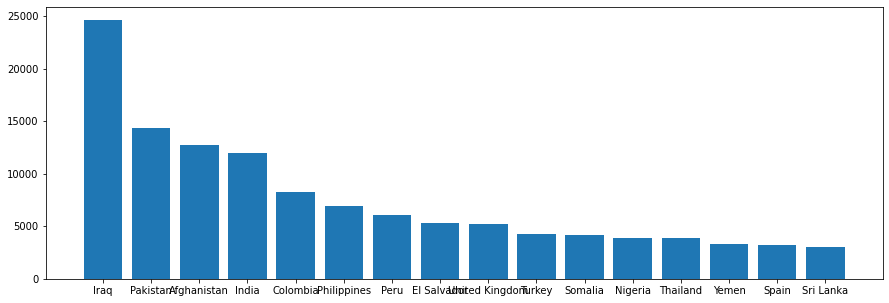

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(TOP_11_MOST_ATTCKED_COUNTRY.country_txt,TOP_11_MOST_ATTCKED_COUNTRY.kills)

## Number of attacks Vs number of kills by most active gangs.


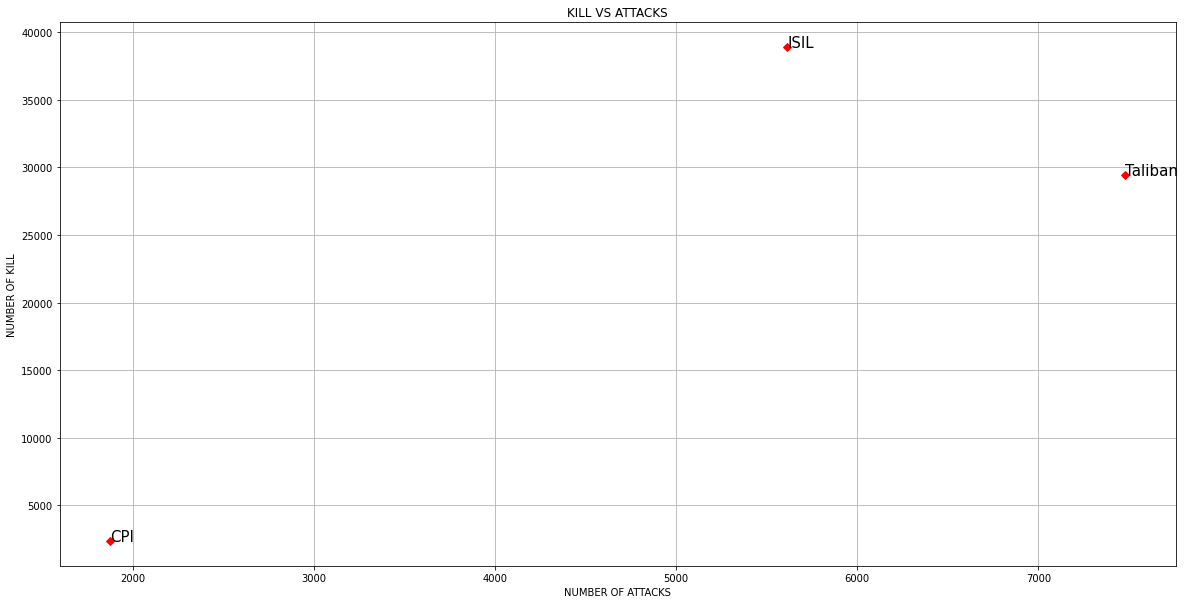

In [ ]:
Taliban=dataset[dataset['gname']=='Taliban']
Taliban_number_attack=Taliban['country_txt'].count()
Taliban_number_kill=Taliban['kills'].sum()
CPI=dataset[dataset['gname']=='Communist Party of India - Maoist (CPI-Maoist)']
CPI_number_attack=CPI['country_txt'].count()
CPI_number_kill=CPI['kills'].sum()
ISIL=dataset[dataset['gname']=='Islamic State of Iraq and the Levant (ISIL)']
ISIL_number_attack=ISIL['country_txt'].count()
ISIL_number_kill=ISIL['kills'].sum()
name_of_gang=['Taliban','CPI','ISIL']
plt.figure(figsize=(20,10))
x_nu_attack=[Taliban_number_attack,CPI_number_attack,ISIL_number_attack]
y_nu_kill=[Taliban_number_kill,CPI_number_kill,ISIL_number_kill]
plt.plot(x_nu_attack,y_nu_kill,'Dr')
plt.grid()
plt.title('KILL VS ATTACKS')
plt.xlabel('NUMBER OF ATTACKS')
plt.ylabel('NUMBER OF KILL')
for i in range(len(x_nu_attack)):
        plt.text(x_nu_attack[i],y_nu_kill[i],name_of_gang[i],fontsize=15)
# so we can write here out three active gang from last 20 year ISIL is the most attacks and killed org.

# conclusion
1.Country with most attacks:  Iraq

2.City with most attacks:  Baghdad

3.Region with the most attacks: Middle East & North Africa

4.Year with the most attacks: 2014

5.Month with the most attacks: 5

6.Group with the most attacks: Taliban

7.Most Attack Types: Bombing/Explosion

8.gang_name	VS number_of_kill

     a) Islamic State of Iraq and the Levant (ISIL)	27174.0

     b)	Taliban	25785.0

     c)	Boko Haram	10732.0

     d)	Liberation Tigers of Tamil Eelam (LTTE)	9393.0

     e)	Shining Path (SL)	9315.0

     f)	Al-Shabaab	6836.0

     g)	Farabundo Marti National Liberation Front (FMLN)	6801.0

     h)	Tehrik-i-Taliban Pakistan (TTP)	5580.0

     i)	Revolutionary Armed Forces of Colombia (FARC)	4380.0

     j)	Kurdistan Workers' Party (PKK)	4093.0

     k)	Al-Qaida in Iraq	3984.0

     l)	Nicaraguan Democratic Force (FDN)	3883.0

     m)	Al-Qaida	3818.0

     n)	Hutu extremists	3203.0

9.Maximum human killed by Al-Qaida

10.In last 20 year Al-Qaida is not active Gang.

11.country	VS number_of_kill

     a)Iraq	21510

     b)	Pakistan	12756

     c)	Afghanistan	10871

     d)	India	10491

     e)	Colombia	6865

     f)	Philippines	5843

     g)	Peru	4916

     h)	Turkey	3767

     i)	El Salvador	3369

     j)	Thailand	3346

     k)	United Kingdom	3212

12.From Last 20 Year 3 Gang are active.
    
     a) Taliban
     
     b) CPI 
      
     c) ISIL

13.YEAR--GANG------NUMBER OF MAXIMUM KILL

     a) 2004	---Taliban---	         48

     b) 2005	---Taliban---       102

     c) 2006	---Taliban---	        168

     d) 2007	---Taliban---	        216

     e) 2008	---Taliban---	        136

     f) 2009	---CPI-Maoist---	    367

     g) 2010	---CPI-Maoist---	    485

     h) 2011	---CPI-Maoist---	    346

     i) 2012	---Taliban---	        755

     j) 2013	---Taliban---	        712

     k) 2014	---ISIL---	         1018

     l) 2015	---Taliban---	       1073

     m) 2016	---ISIL---	         1153

     n) 2017	---ISIL---	         1019

14.These are two most method used by all three most active gang is 
Bombing/Explosion, Armed Assault and Hostage Taking (Kidnapping)

15.Al_Qaida Most mischievous gang in early 20's and have done most number kill till date and the weapon used for killing is only two
Explosives and vehicle-borne explosive
so if we control on the illegal tranportation of weapons then we can reduse
we can see that in only one year (2001) there were 2 attacks on the same day so we can in same country
so we can say that there might me some disput between USA and Al_Qaida